## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [3]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "radius_smaller_2"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


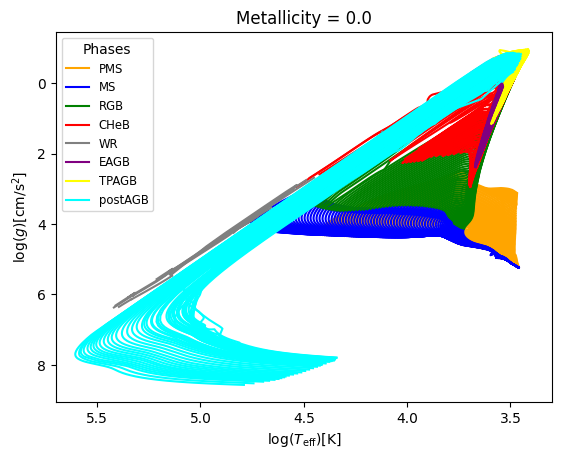

In [4]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [5]:
print_uniques("log_R", iso_df)
# print_uniques_count("log_R", iso_df)

log_R : 1467122 unique values, range [-2.100746699589491, 3.1297545143214007]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


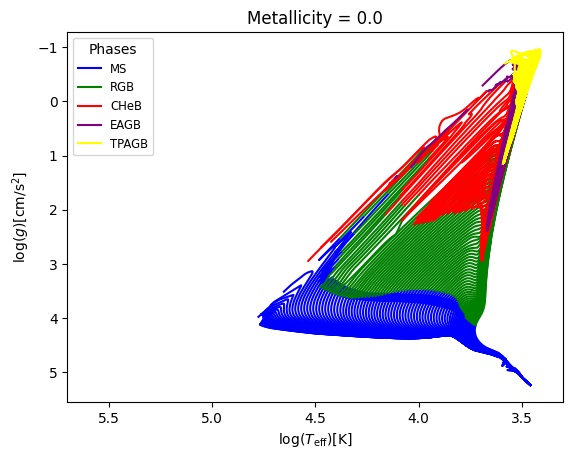

In [6]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [7]:
print_uniques("log_R", phase_filtered_iso_df)
# print_uniques_count("log_R", phase_filtered_iso_df)

log_R : 1140744 unique values, range [-0.9974747647513328, 3.1297545143214007]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
710519,10.3,3.494330,0.333655,5.0,0.50,0.731260,1.984279
710520,10.3,3.493821,0.327187,5.0,0.50,0.731260,1.987513
710521,10.3,3.493286,0.320668,5.0,0.50,0.731260,1.990773
710522,10.3,3.492773,0.314193,5.0,0.50,0.731260,1.994010


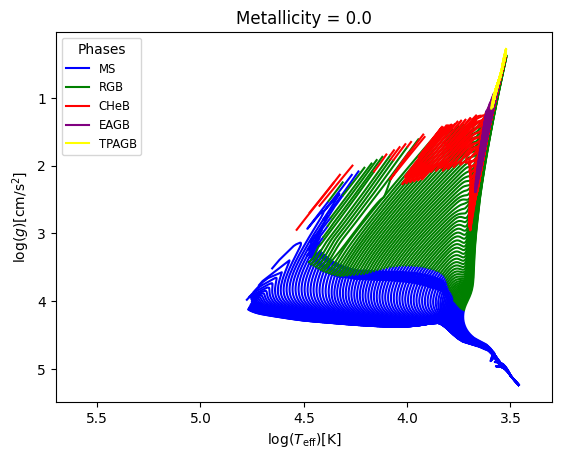

In [8]:
phase_radius_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'log_R' : ("<", 2)})
display(phase_radius_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_radius_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [9]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_radius_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 298.5447575808816
Median value in train data for the mass parameter: 2.249212751334093
Mean value in train data for the mass parameter: 9.097040217017632
Range in train data for the radius parameter : -0.9974628481553472 - 1.999998873527528
Median value in train data for the radius parameter: 0.8262164571858992
Mean value in train data for the radius parameter: 0.8043208282054404

Testing set statistics:
Range in test data for the mass parameter : 0.099998052173157 - 295.28551339050483
Median value in test data for the mass parameter: 2.252464327105924
Mean value in test data for the mass parameter: 9.09028903391819
Range in test data for the radius parameter : -0.9974747647513328 - 1.999996679628252
Median value in test data for the radius parameter: 0.8251576743650201
Mean value in test data for the radius parameter: 0.8041270147773332

(532893, 4) (177631, 4)
(532893, 2) (177631, 2)


## Model training

### Linear regression

In [11]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


radius_smaller_2 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.3102467498185517
RMSE :  19.438651844869952
MAE :  8.696264833312153
MedAE :  5.1846366874535645
CORR :  0.5569979802415961
MAX_ER :  261.3056383934062
Percentiles : 
  75th percentile :  11.849093255412697
  90th percentile :  15.176450290685626
  95th percentile :  17.274333545490208
  99th percentile :  84.45008144417727



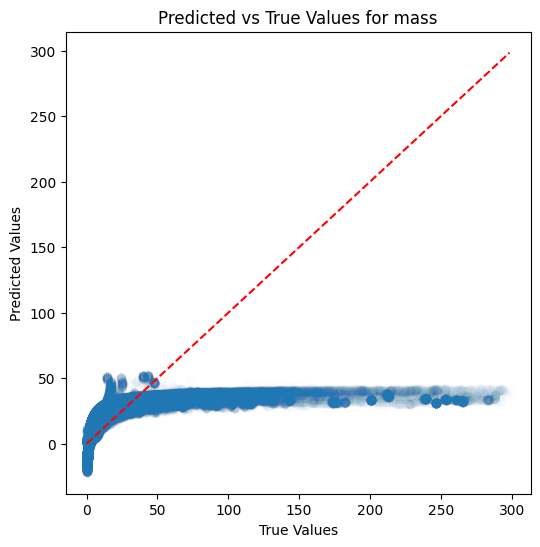

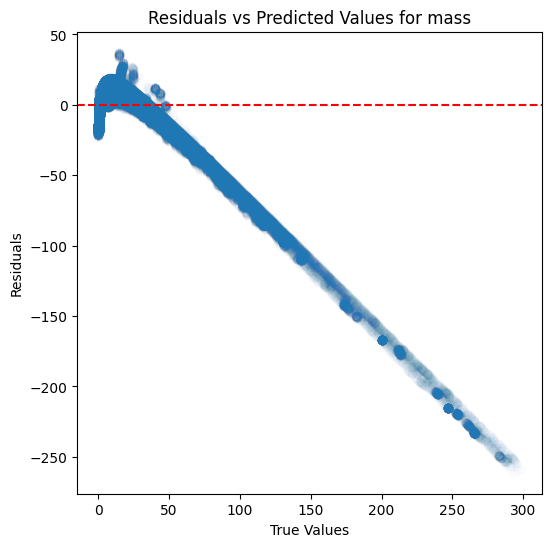

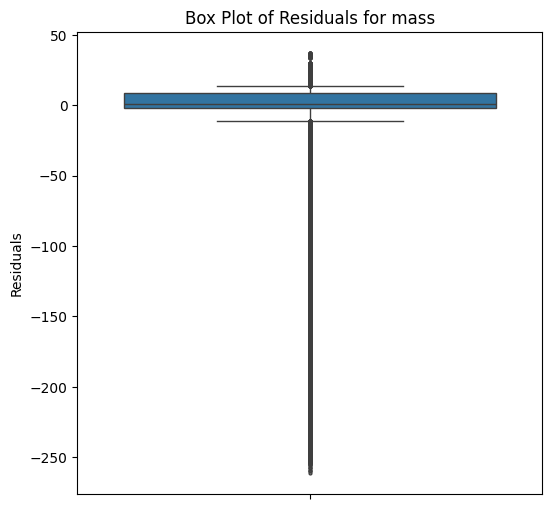

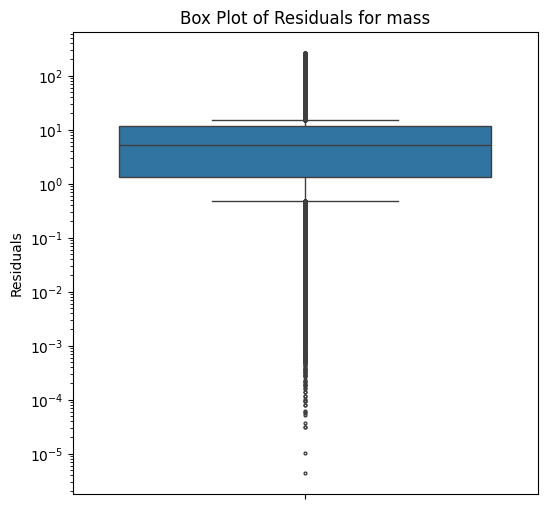

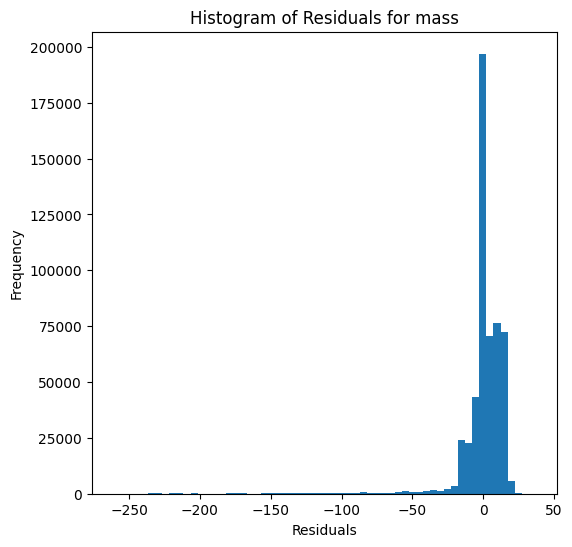

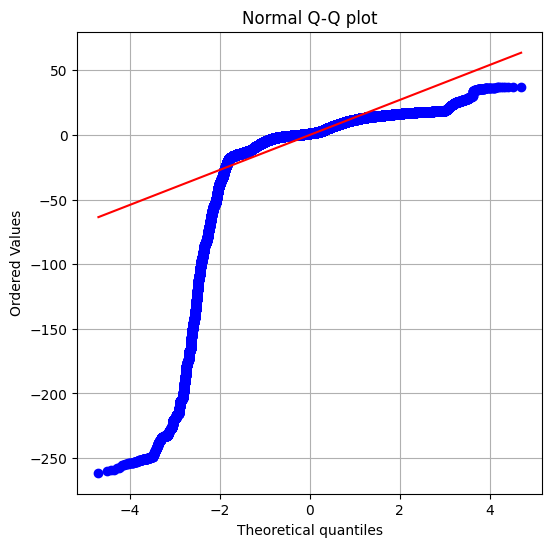


radius results:
RVE :  0.9846531553265465
RMSE :  0.08725306041887644
MAE :  0.06624007118953819
MedAE :  0.05203542368610847
CORR :  0.9922969088567093
MAX_ER :  0.49401274332634215
Percentiles : 
  75th percentile :  0.09480314570464299
  90th percentile :  0.13738847216959074
  95th percentile :  0.1660368008055224
  99th percentile :  0.269169346483319



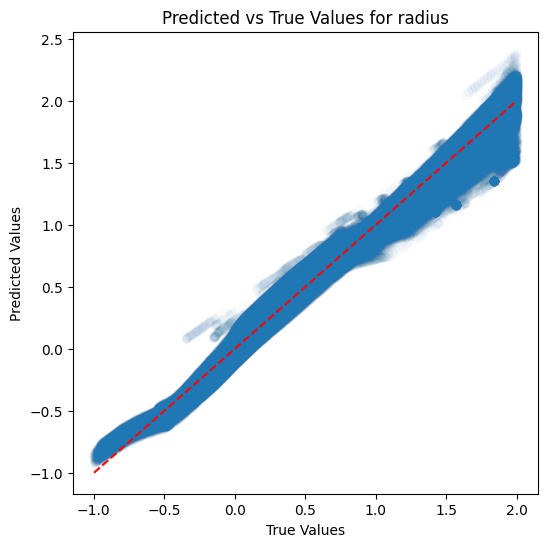

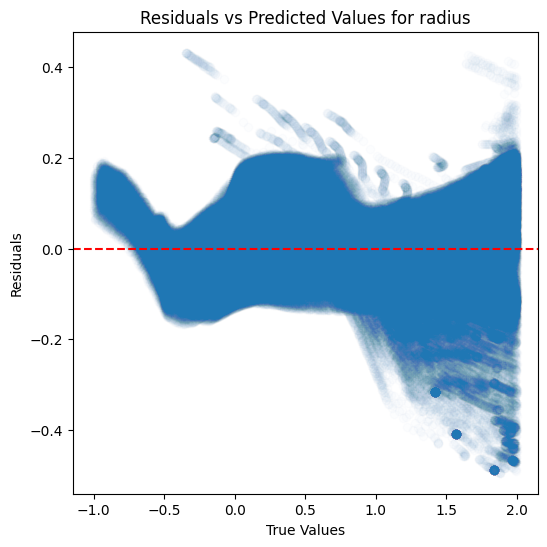

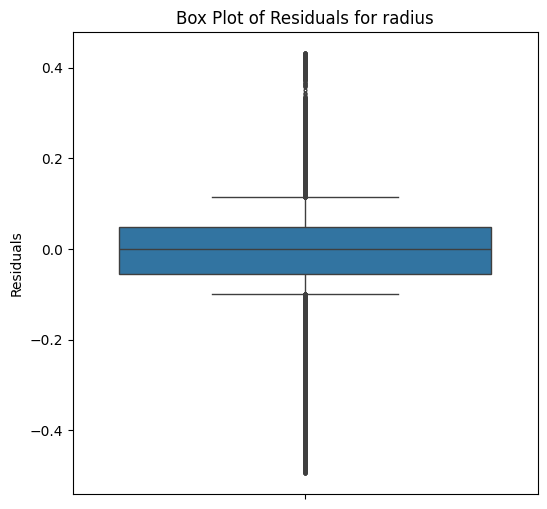

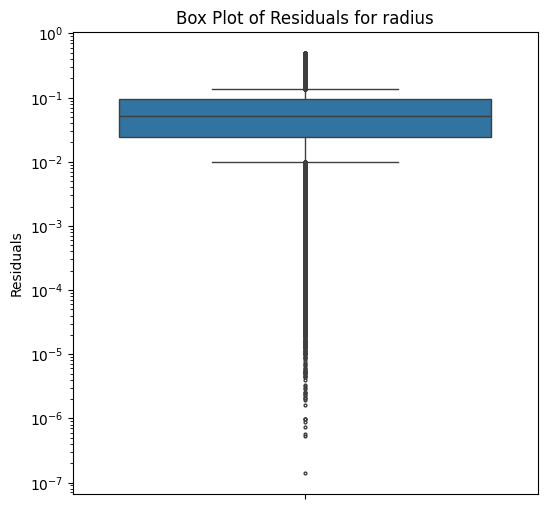

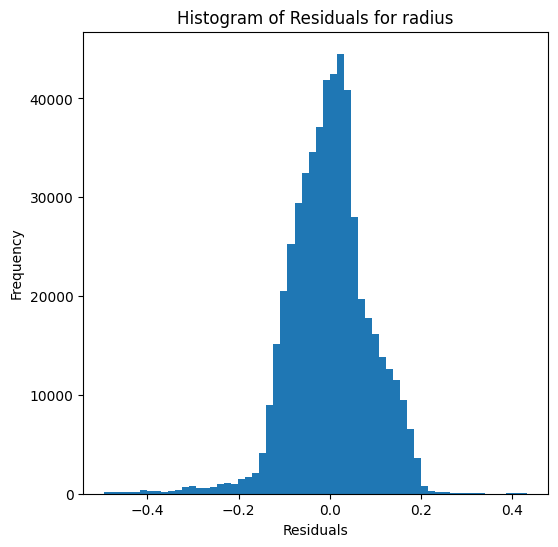

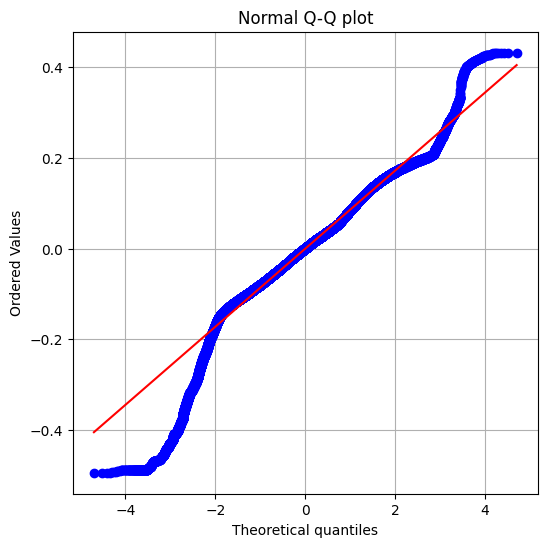

In [12]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [15]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


radius_smaller_2 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9943220153507675
RMSE :  1.7636716730611126
MAE :  0.1672164172453923
MedAE :  0.0031488445426706146
CORR :  0.9971575469792436
MAX_ER :  182.61326642493862
Percentiles : 
  75th percentile :  0.017163671043497697
  90th percentile :  0.07654339813004095
  95th percentile :  0.23415866024596685
  99th percentile :  3.3371744676276474



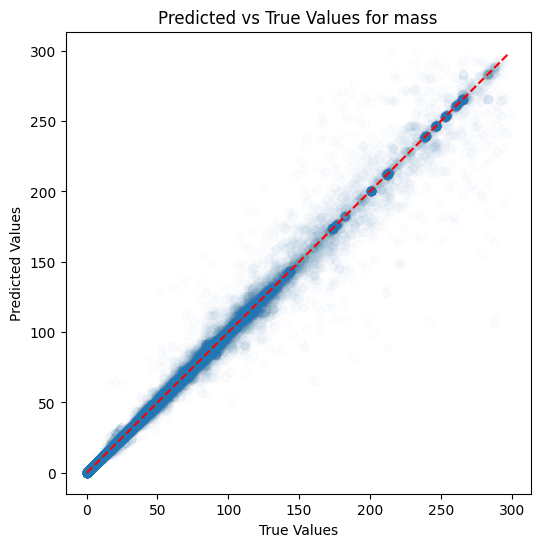

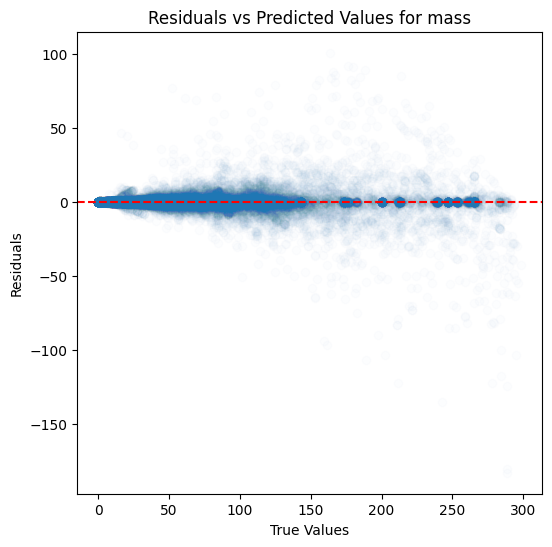

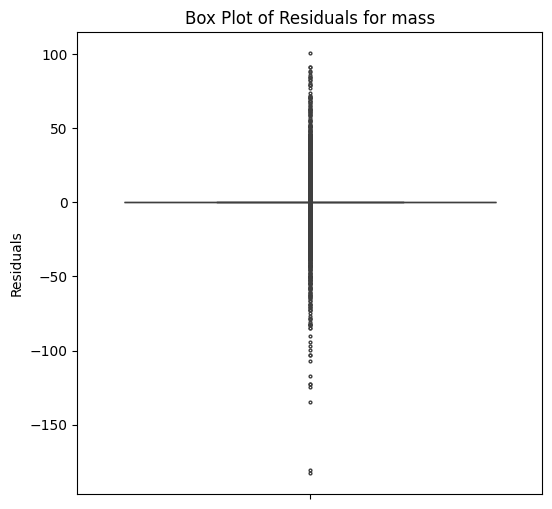

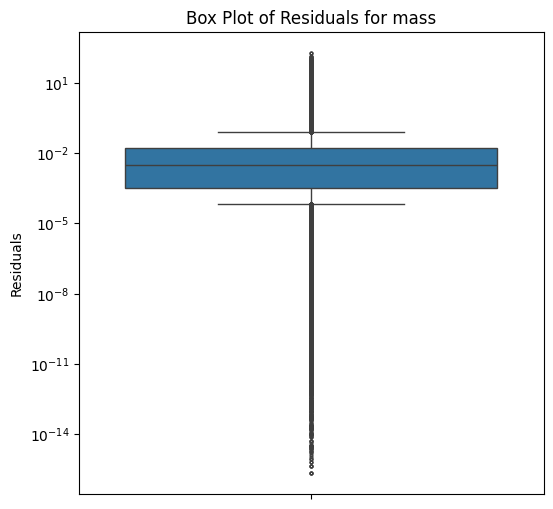

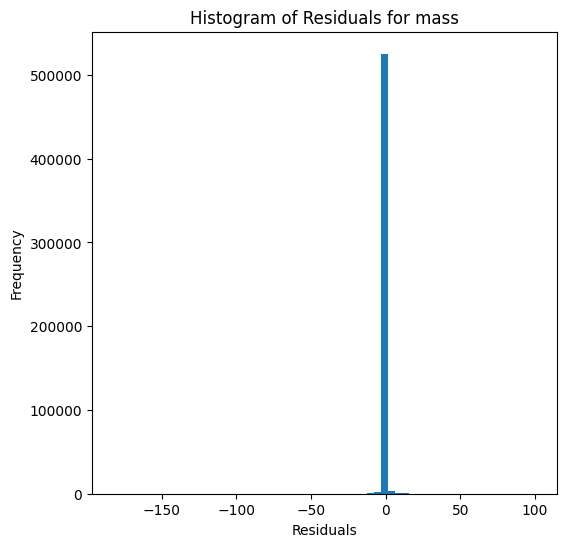

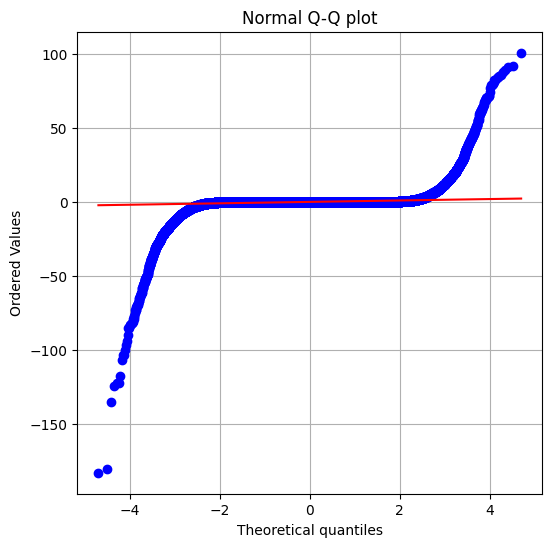


radius results:
RVE :  0.9998115778518851
RMSE :  0.009669005684649247
MAE :  0.005618614776581095
MedAE :  0.0033117593057979677
CORR :  0.9999058029522259
MAX_ER :  0.37723464142468943
Percentiles : 
  75th percentile :  0.0072159906923021655
  90th percentile :  0.012628182701032387
  95th percentile :  0.017569137981178838
  99th percentile :  0.03717903328653559



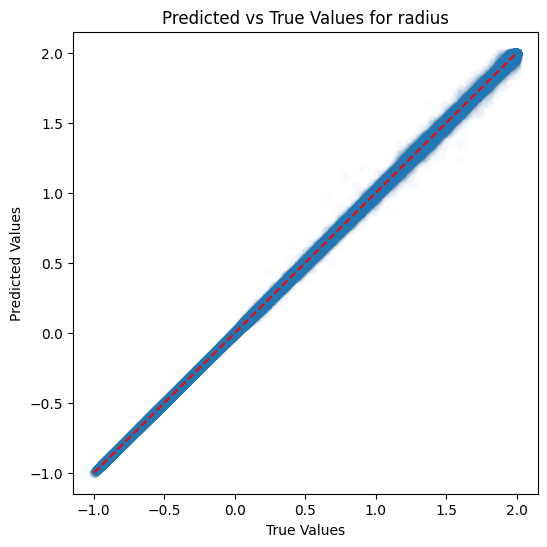

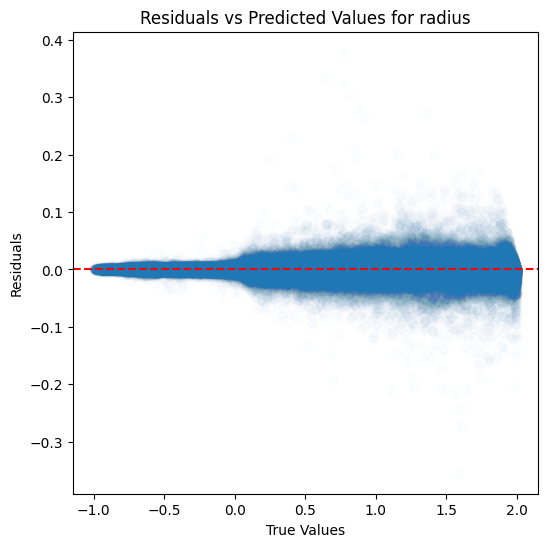

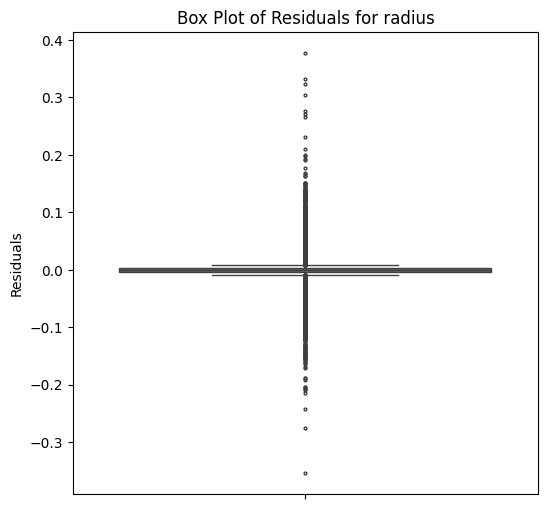

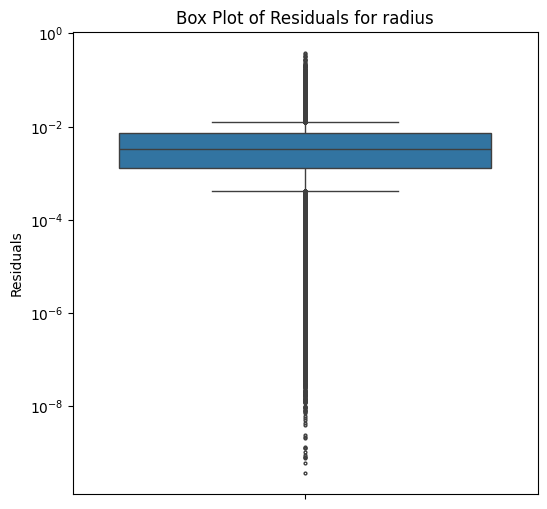

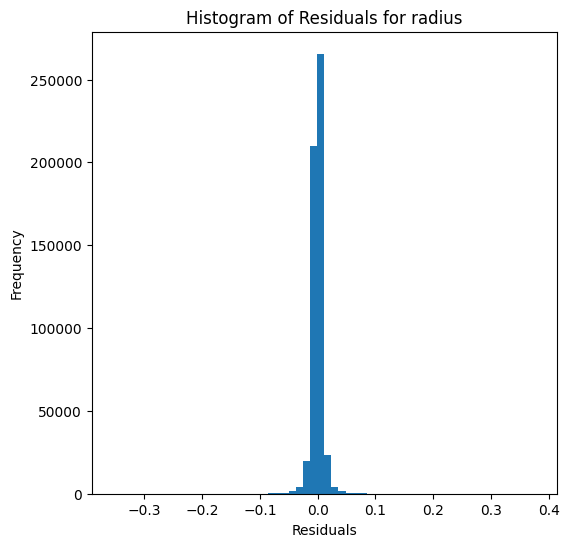

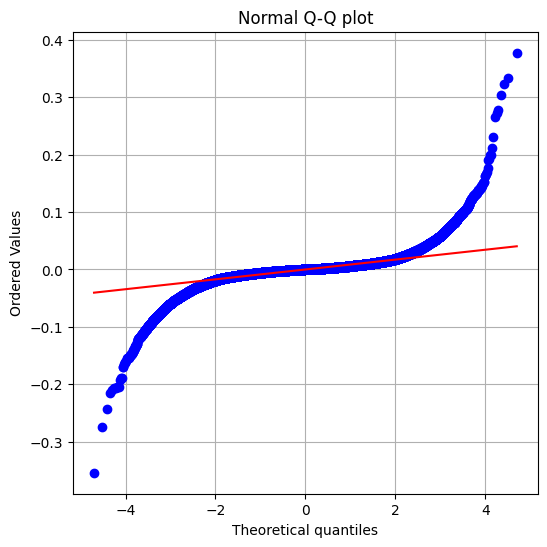

In [16]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [17]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


radius_smaller_2 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9888675271489861
RMSE :  2.470013224813223
MAE :  0.261192057981603
MedAE :  0.008363755989035049
CORR :  0.9945490767006938
MAX_ER :  150.51232786793435
Percentiles : 
  75th percentile :  0.035704135982769
  90th percentile :  0.14538366079065118
  95th percentile :  0.4380747136485751
  99th percentile :  5.155305733321427



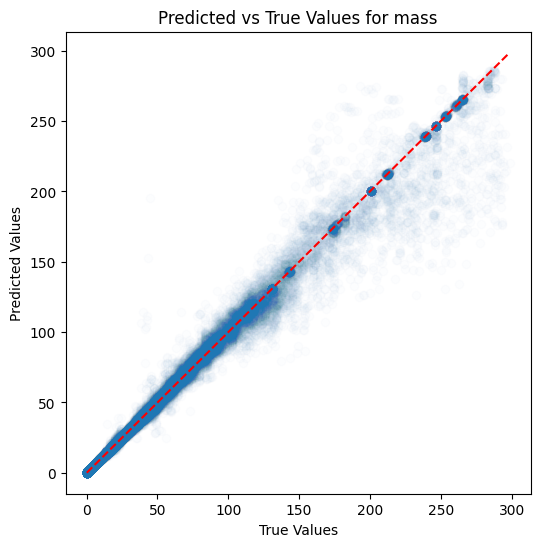

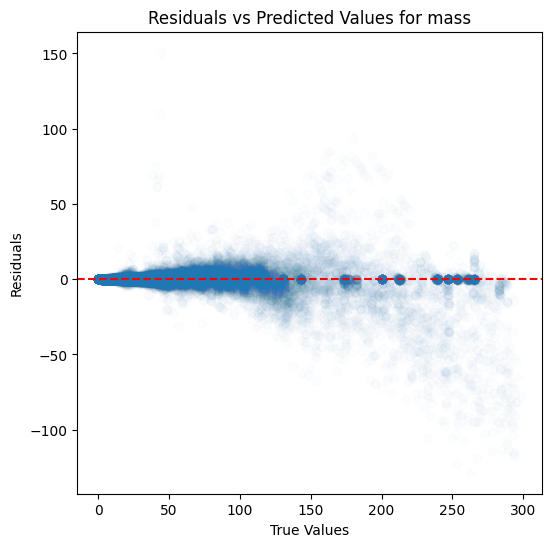

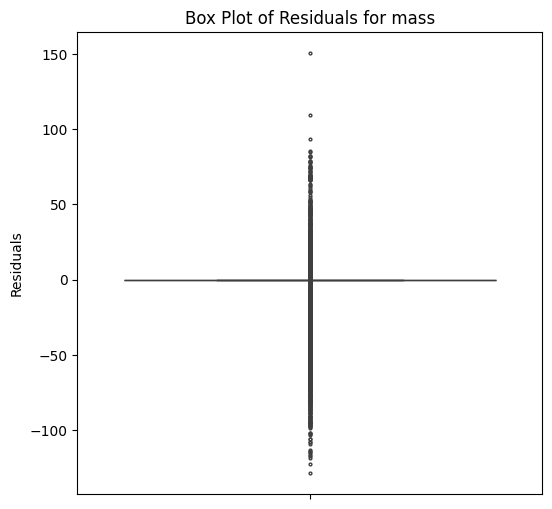

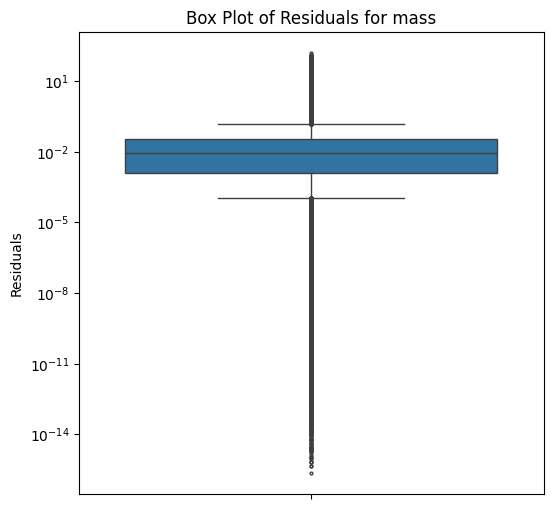

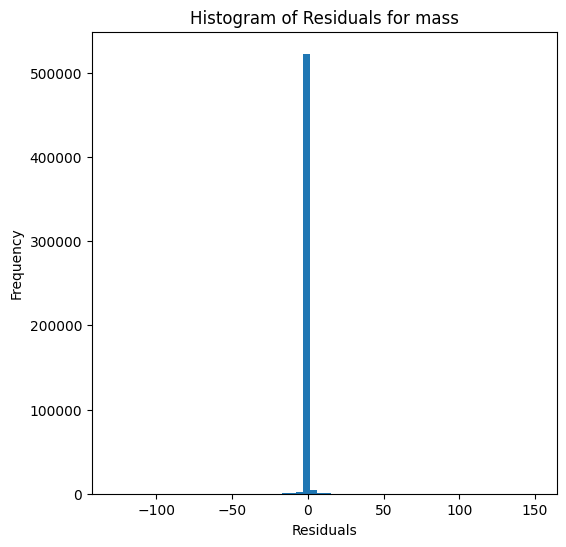

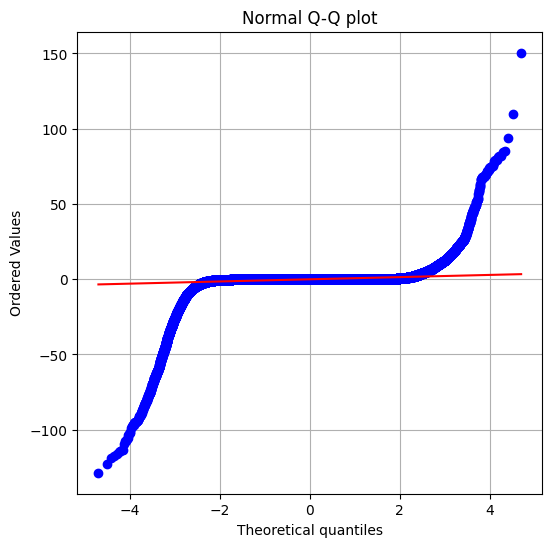


radius results:
RVE :  0.9999041333761592
RMSE :  0.006897258284182979
MAE :  0.004127316661810343
MedAE :  0.002619345244726179
CORR :  0.9999521286559027
MAX_ER :  0.33797730077947574
Percentiles : 
  75th percentile :  0.005199928496694872
  90th percentile :  0.009269714995062305
  95th percentile :  0.012709358996536088
  99th percentile :  0.02374217655496324



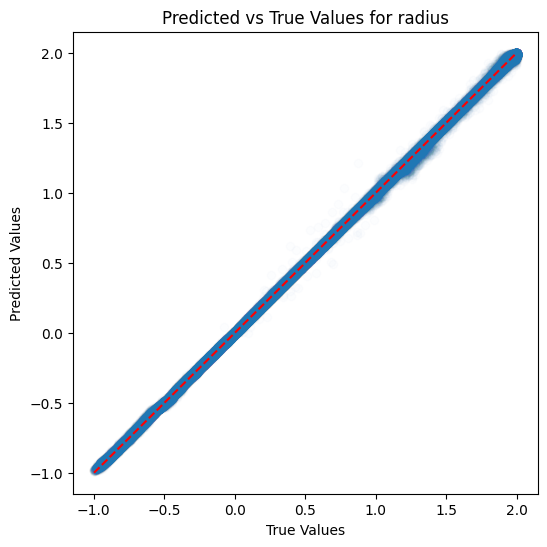

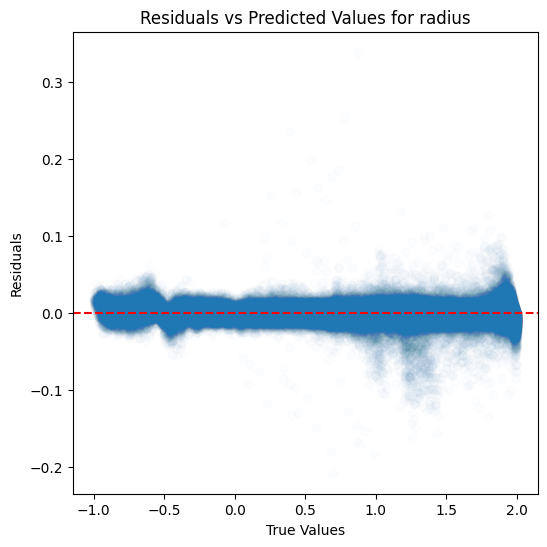

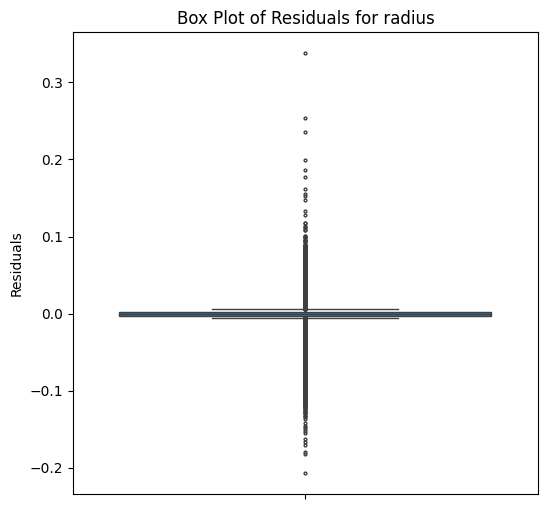

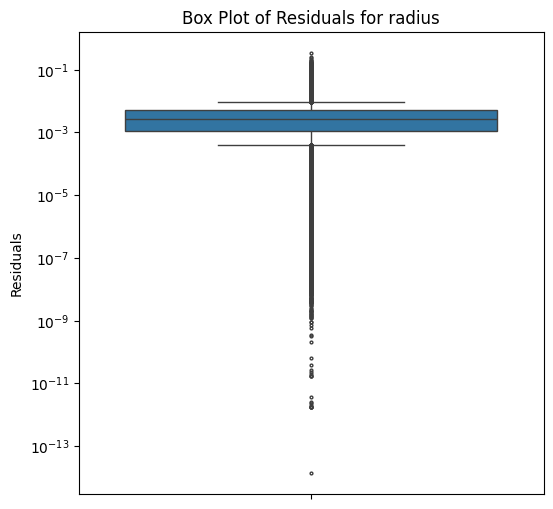

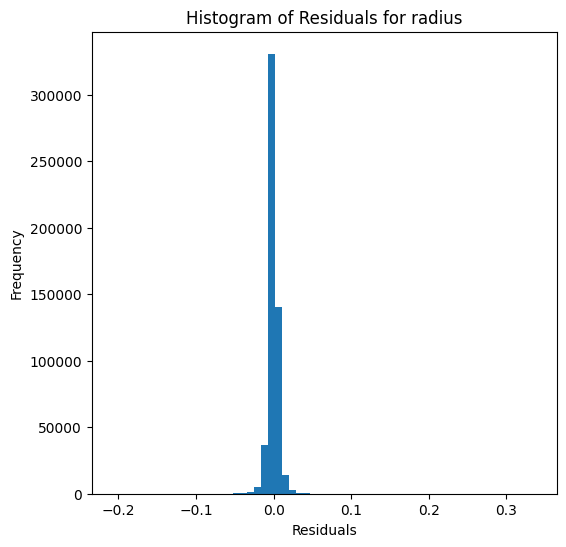

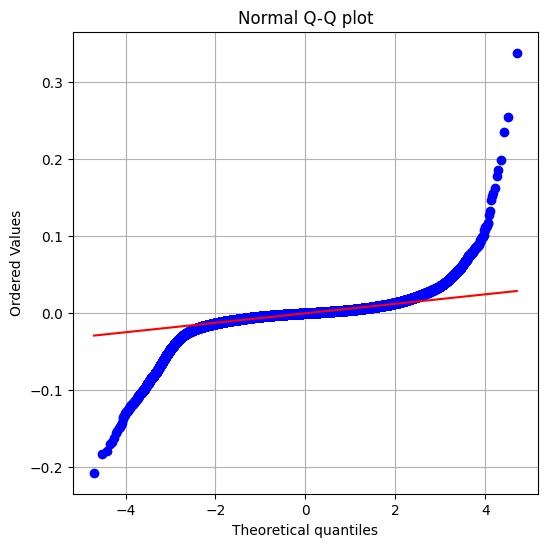

In [18]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [19]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


radius_smaller_2 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9977654525173469
RMSE :  1.106405557794512
MAE :  0.1104427033594873
MedAE :  0.004294263808398924
CORR :  0.9988842059227688
MAX_ER :  88.64434915806976
Percentiles : 
  75th percentile :  0.014587076562261991
  90th percentile :  0.05377468082827546
  95th percentile :  0.15508125752581825
  99th percentile :  2.221246192601153



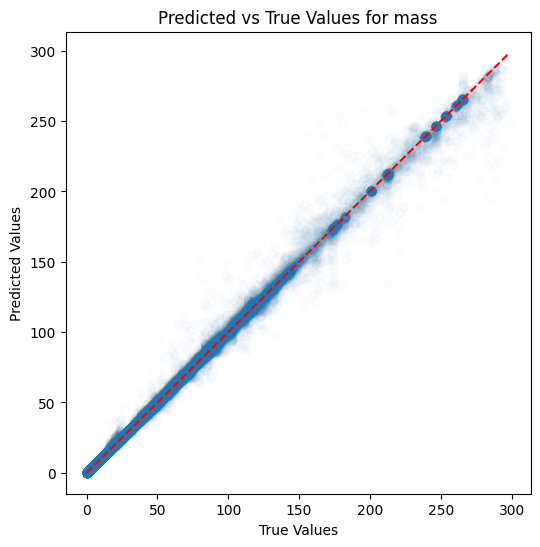

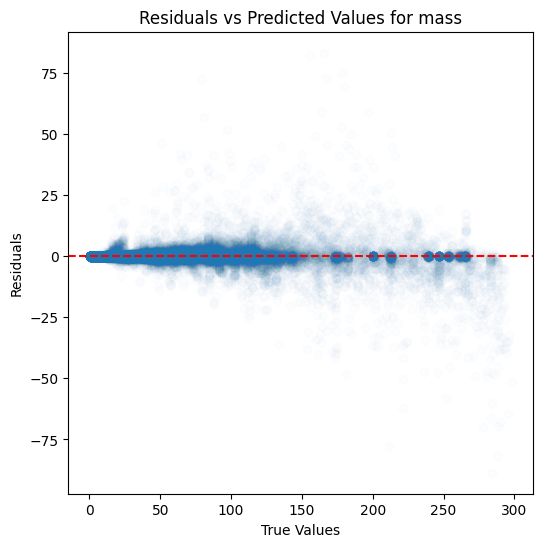

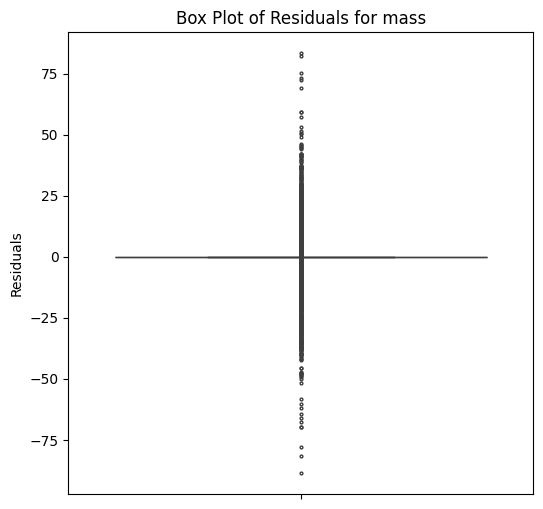

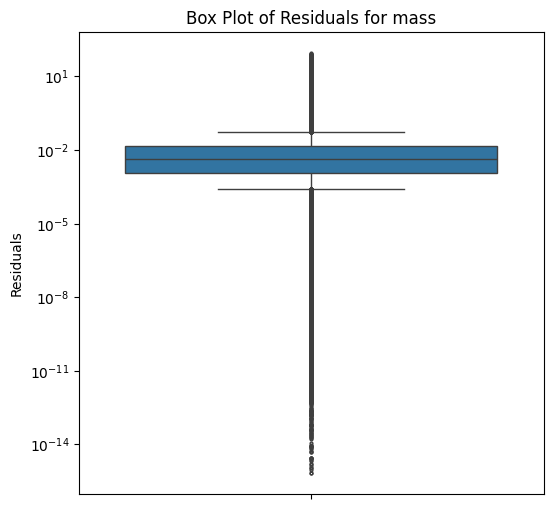

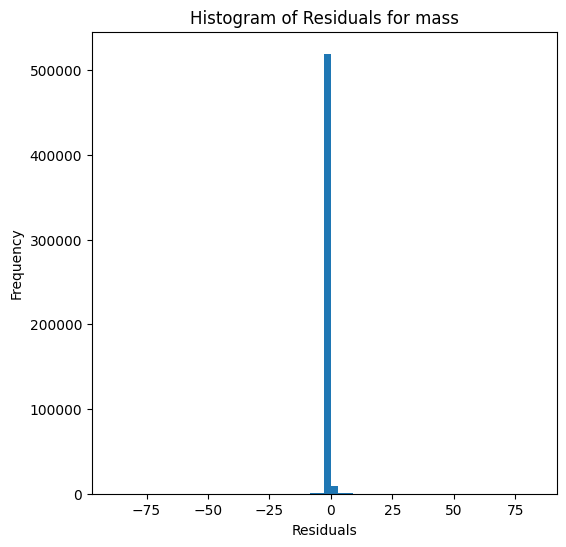

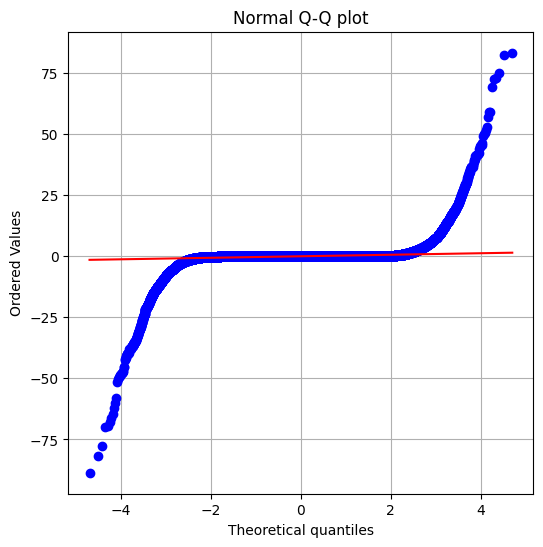


radius results:
RVE :  0.999951272983253
RMSE :  0.0049176271424818015
MAE :  0.0026654413006181126
MedAE :  0.0013832506844660974
CORR :  0.9999756366686913
MAX_ER :  0.17948440765749835
Percentiles : 
  75th percentile :  0.0032437173083786908
  90th percentile :  0.006409100735899753
  95th percentile :  0.009295252584577429
  99th percentile :  0.018290912424575072



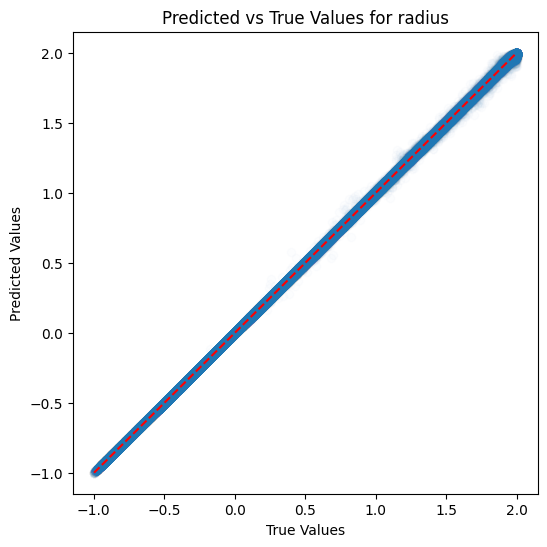

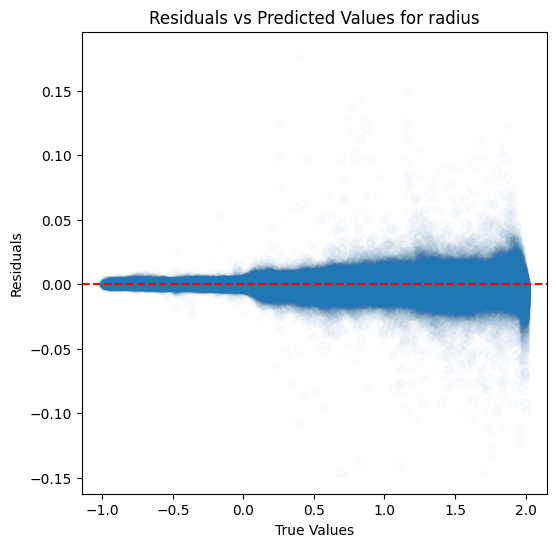

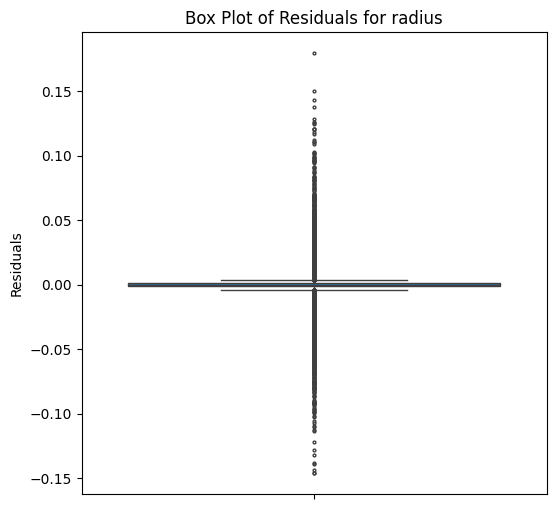

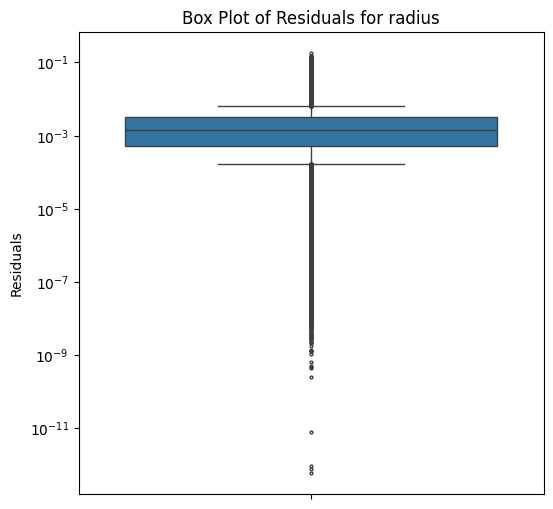

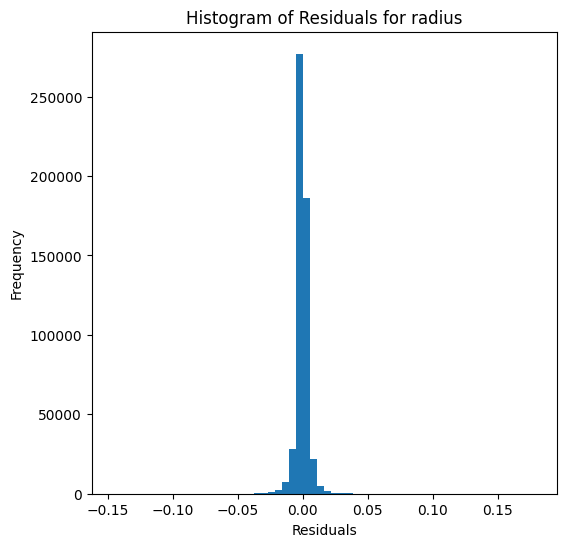

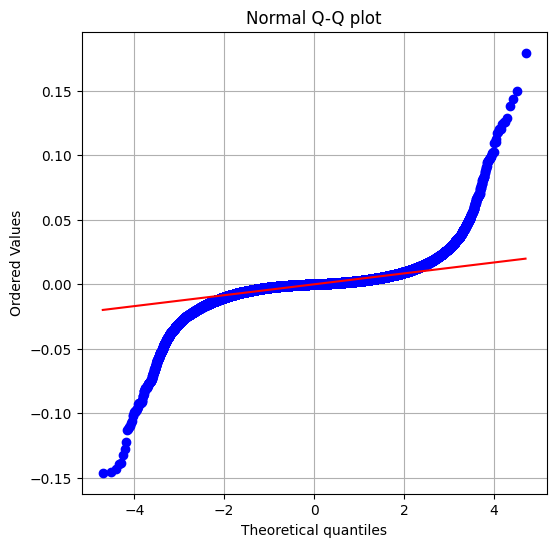

In [20]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [21]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


radius_smaller_2 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9937118639114503
RMSE :  1.8560096519686702
MAE :  0.4363975412594455
MedAE :  0.08100304272977965
CORR :  0.9968517111907563
MAX_ER :  86.42459499868005
Percentiles : 
  75th percentile :  0.21174612027416106
  90th percentile :  0.7133989204356558
  95th percentile :  1.6452775630086425
  99th percentile :  7.347762604196689



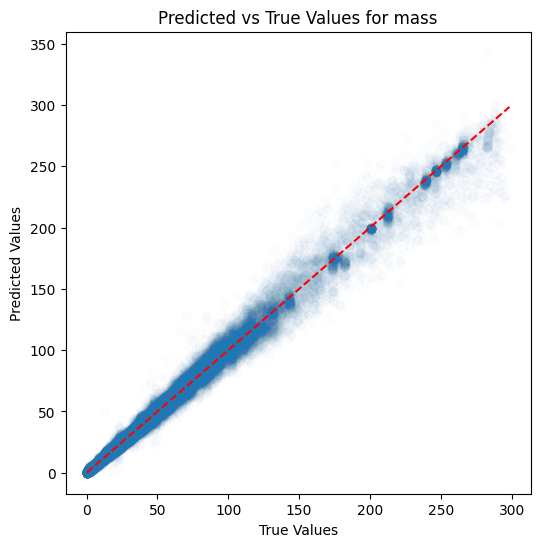

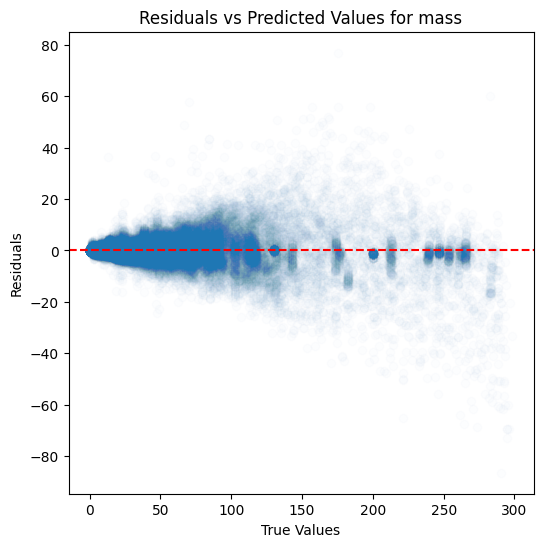

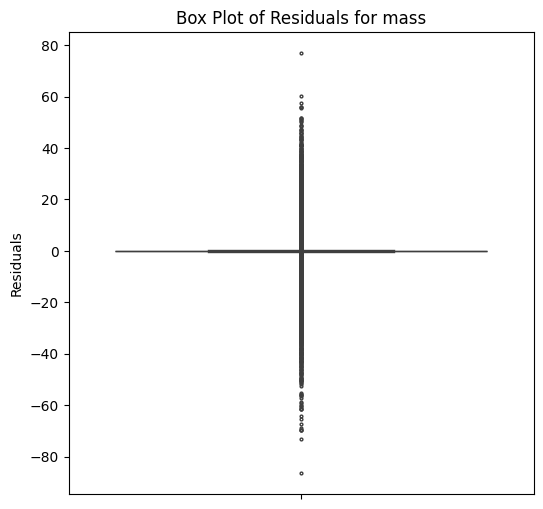

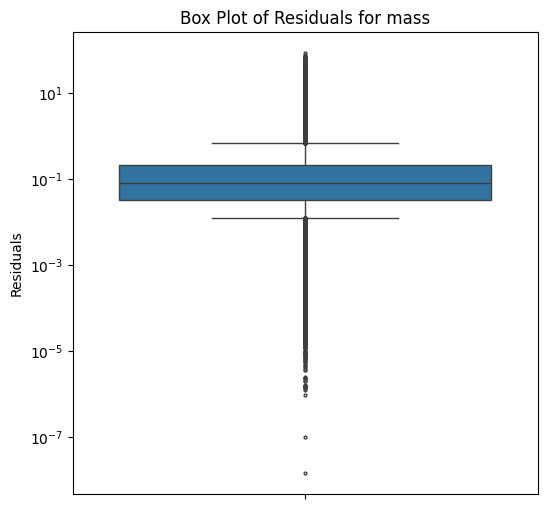

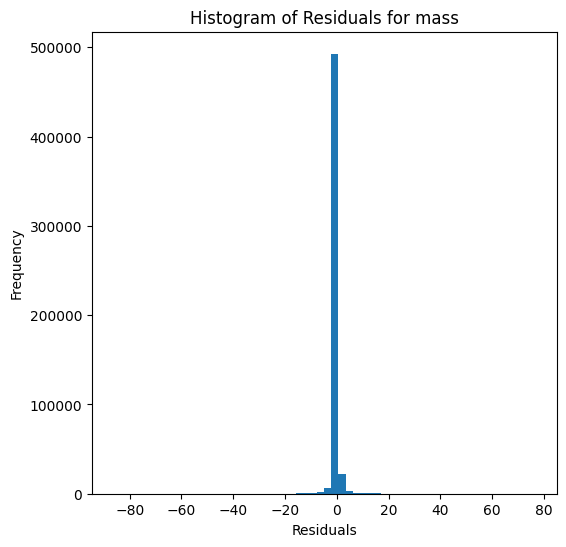

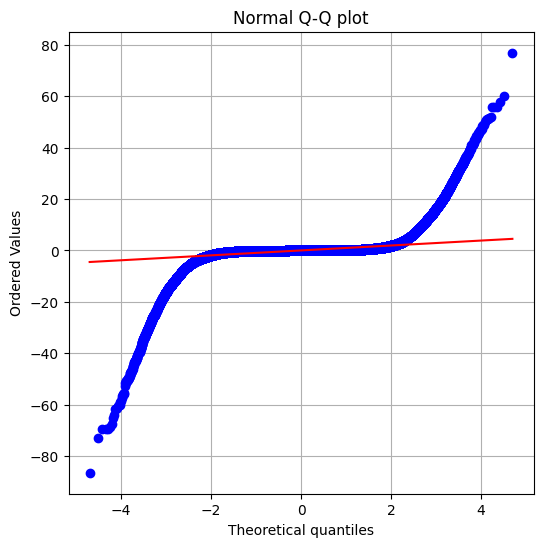


radius results:
RVE :  0.9996429764945339
RMSE :  0.01330821370425615
MAE :  0.009894844574656869
MedAE :  0.007711431890727205
CORR :  0.9998214885641119
MAX_ER :  0.39307579401764536
Percentiles : 
  75th percentile :  0.013737511542170955
  90th percentile :  0.020965088701571974
  95th percentile :  0.026321597167541757
  99th percentile :  0.0393867510232041



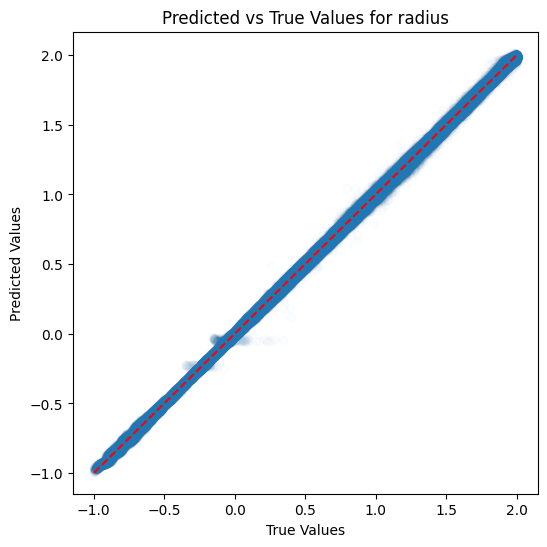

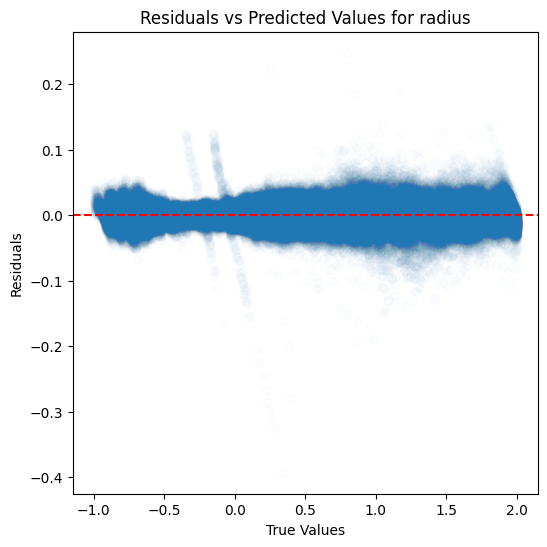

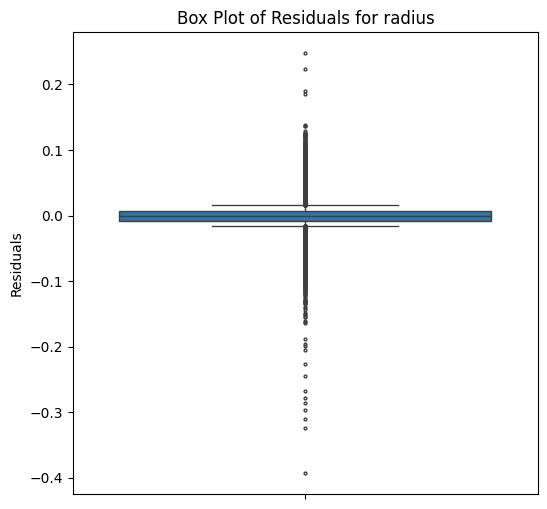

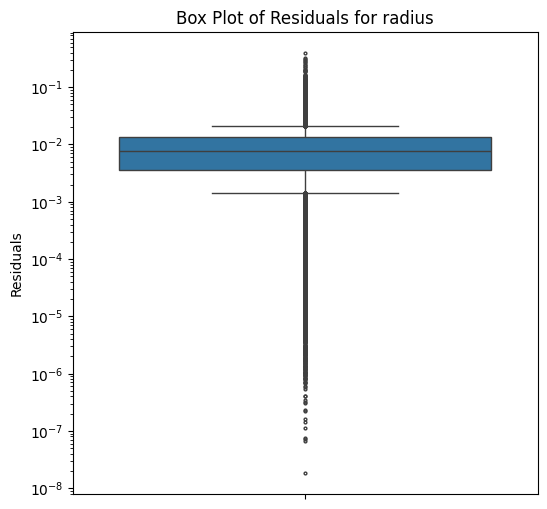

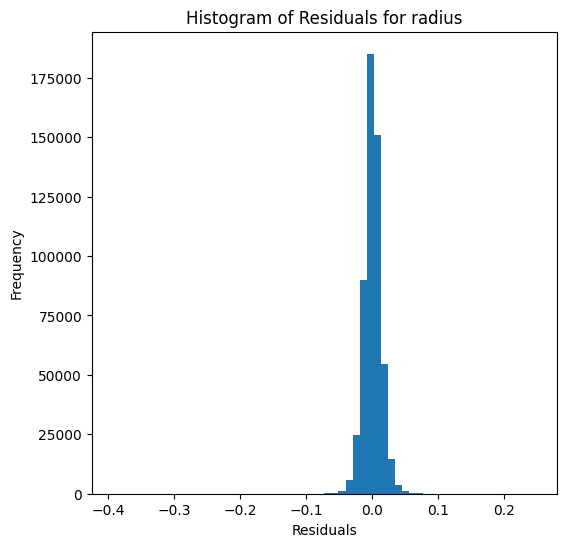

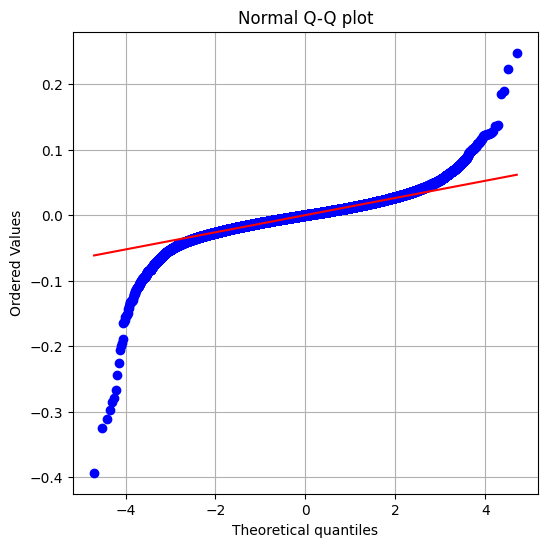

In [22]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [10]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


radius_smaller_2 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.905138182906372
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.9829241395016477
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.0626762693210265
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.858795379842943
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.9620652667449714

mass results:
RVE :  0.9792369541945812
RMSE :  3.3726297453203906
MAE :  0.8997750595141963
MedAE :  0.28337539331552986
CORR :  0.9895752234715874
MAX_ER :  175.29303429574904
Percentiles : 
  75th percentile :  0.5190591681651997
  90th percentile :  1.2522099849914958
  95th percentile :  2.9896415494123163
  99th percentile :  13.816679397285577



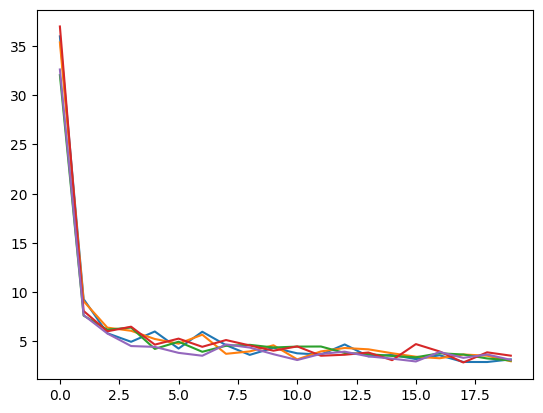

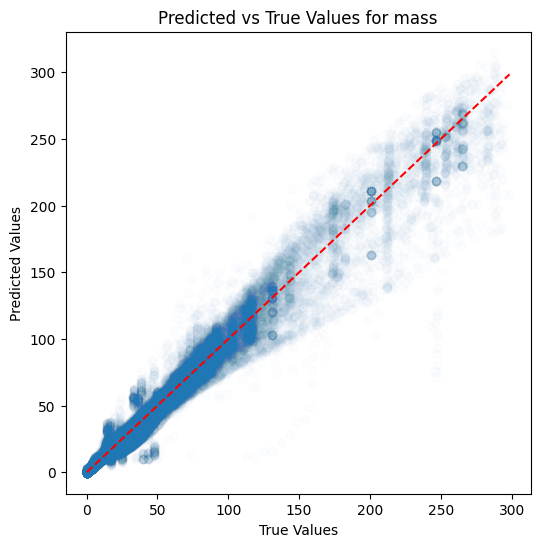

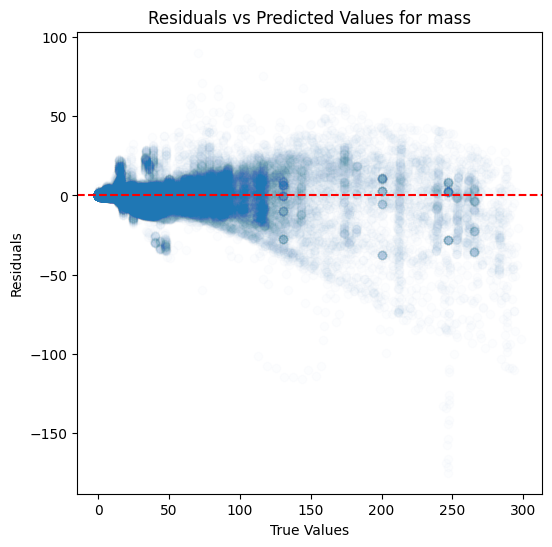

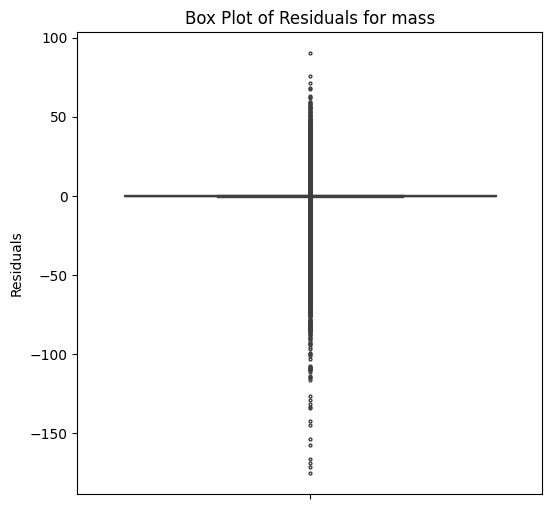

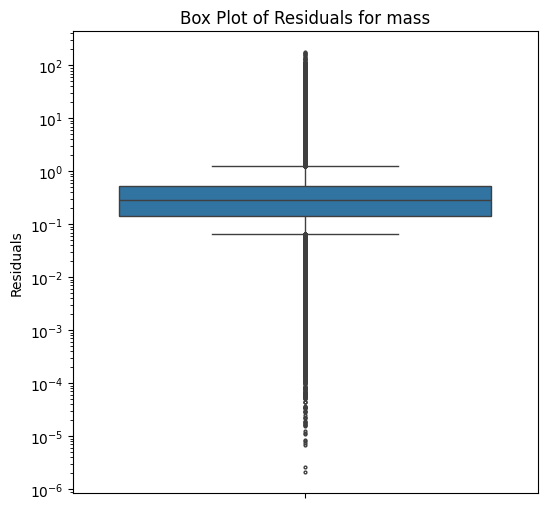

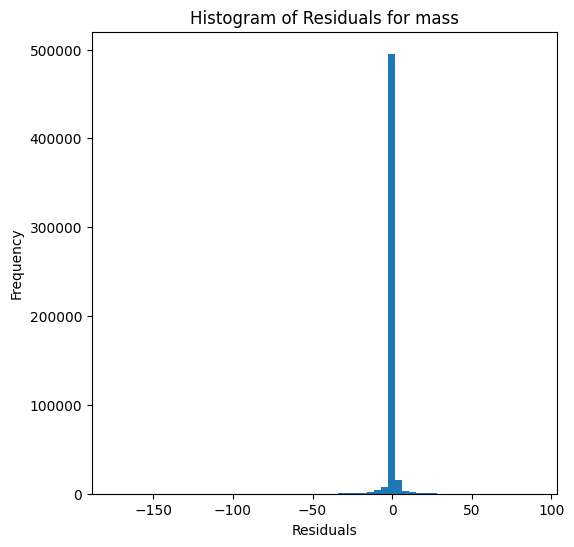

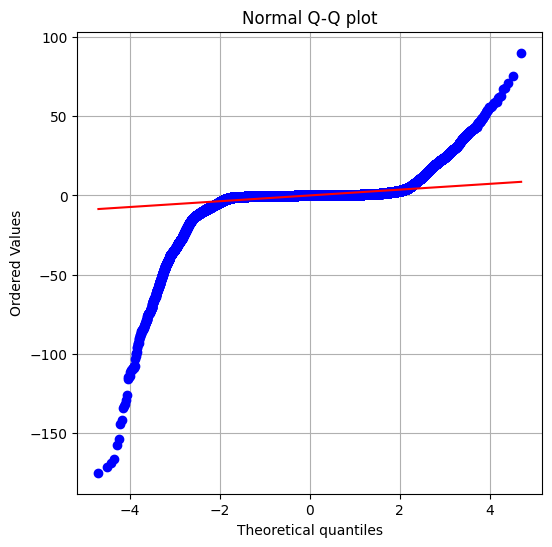


radius results:
RVE :  0.9898325232960165
RMSE :  0.0727925613138646
MAE :  0.05335985123425558
MedAE :  0.04066783280266528
CORR :  0.9949047786205186
MAX_ER :  0.6268139914879132
Percentiles : 
  75th percentile :  0.07208341343631353
  90th percentile :  0.114103600890968
  95th percentile :  0.1476434097778386
  99th percentile :  0.2270191628688485



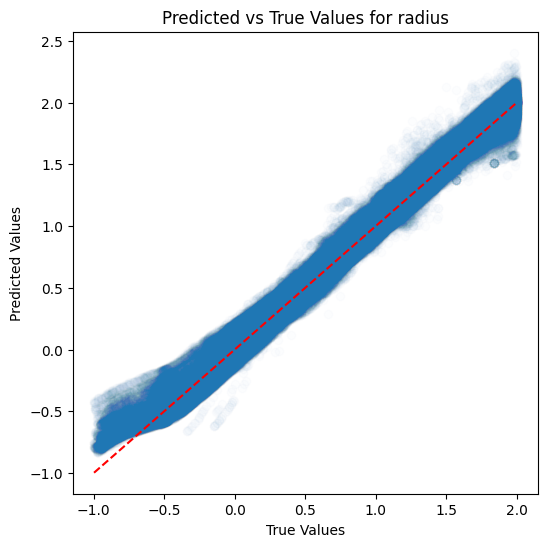

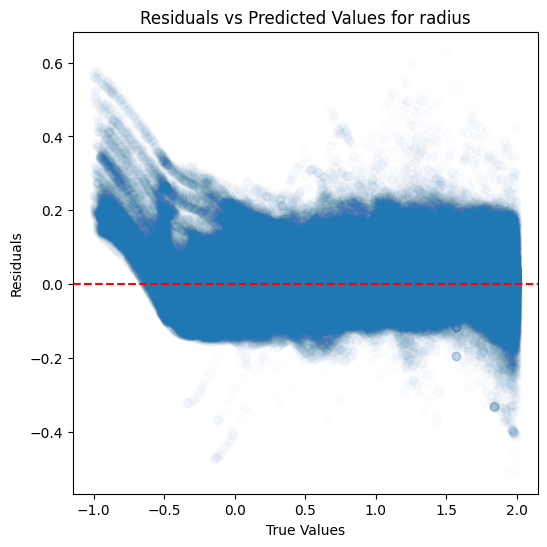

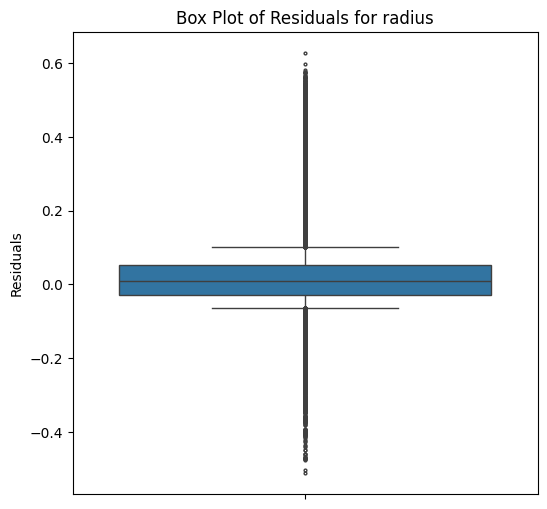

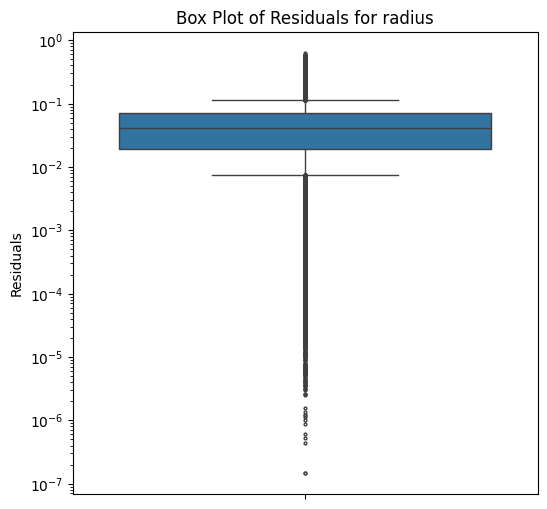

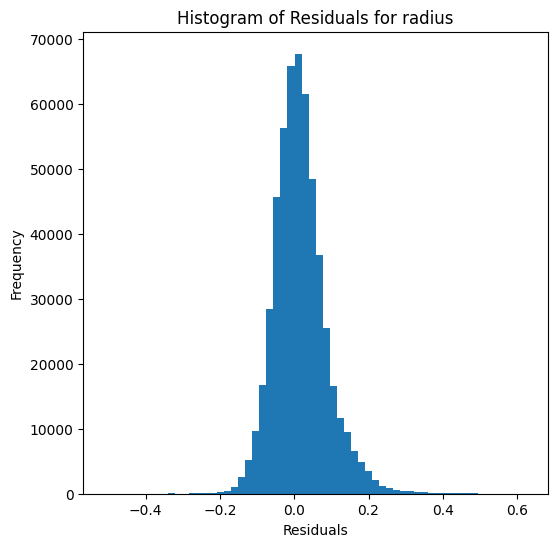

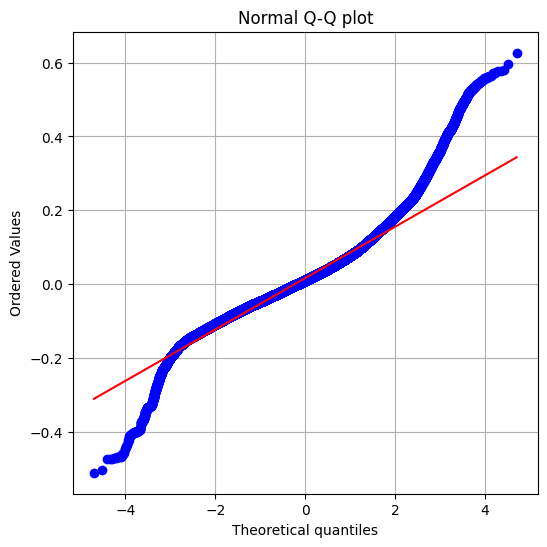

In [11]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)